In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
xls_data=pd.read_excel("./table.xlsx")

In [3]:
t2_dat=xls_data.loc[:,"# of turns":"HFSS"]

In [4]:
t3_dat=xls_data.loc[:,"# of turns.1":"HFSS.1"]

In [5]:
t4_dat=xls_data.loc[:,"# of turns.2":"HFSS.2"]

In [6]:
t2_dat=t2_dat.replace(np.nan,0)
t3_dat=t3_dat.replace(np.nan,0)
t4_dat=t4_dat.replace(np.nan,0)

In [7]:
def data_restore(dat):
    for col_name in dat.columns[:5]:
        temp=0
        for i in range(len(dat[col_name])):
            if (dat.loc[i,col_name]!=0):
                temp=dat.loc[i,col_name]
            if (dat.loc[i,col_name]==0):
                dat.loc[i,col_name]=temp
    return dat

In [8]:
t2_dat=data_restore(t2_dat)
t3_dat=data_restore(t3_dat)
t4_dat=data_restore(t4_dat)

In [9]:
total_dat_temp=np.vstack([t2_dat.values,t3_dat.values,t4_dat.values])

In [10]:
del_index=np.where(total_dat_temp[:,6]==0)[0]

In [11]:
total_dat_temp=pd.DataFrame(total_dat_temp,columns=t2_dat.columns)

In [12]:
total_dat=total_dat_temp.drop(del_index)

In [13]:
total_dat.to_csv("preprocessed_data.csv",
                 columns=total_dat.columns,sep=",", index=False)

In [14]:
data=total_dat.values

In [15]:
log_dat_x=np.log(data[:,:6])

In [16]:
log_dat_y=np.log(data[:,6])

In [17]:
x_train=np.hstack([log_dat_x,data[:,:6]])

In [18]:
mean_x=np.mean(x_train, axis=0)
std_x=np.std(x_train, axis=0)

In [19]:
x_train=(x_train - mean_x) / std_x

In [20]:
mean_y=np.mean(log_dat_y)
std_y=np.std(log_dat_y)

In [21]:
y_train=(log_dat_y-mean_y)/std_y

In [22]:
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(y_train)

In [23]:
model=nn.Linear(12,1)

In [24]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1293, -0.2220,  0.2634, -0.0135,  0.0188,  0.0573, -0.1655, -0.1723,
         -0.1674, -0.1620, -0.0406,  0.2791]], requires_grad=True), Parameter containing:
tensor([-0.2816], requires_grad=True)]


In [25]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [26]:
nb_epochs = 100000
for epoch in range(nb_epochs+1):

    prediction = torch.squeeze(model(x_train))
    cost = F.mse_loss(prediction, y_train) 
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/100000 Cost: 1.908844
Epoch  100/100000 Cost: 1.893871
Epoch  200/100000 Cost: 1.879024
Epoch  300/100000 Cost: 1.864301
Epoch  400/100000 Cost: 1.849700
Epoch  500/100000 Cost: 1.835223
Epoch  600/100000 Cost: 1.820865
Epoch  700/100000 Cost: 1.806627
Epoch  800/100000 Cost: 1.792509
Epoch  900/100000 Cost: 1.778507
Epoch 1000/100000 Cost: 1.764624
Epoch 1100/100000 Cost: 1.750855
Epoch 1200/100000 Cost: 1.737201
Epoch 1300/100000 Cost: 1.723662
Epoch 1400/100000 Cost: 1.710235
Epoch 1500/100000 Cost: 1.696919
Epoch 1600/100000 Cost: 1.683716
Epoch 1700/100000 Cost: 1.670621
Epoch 1800/100000 Cost: 1.657635
Epoch 1900/100000 Cost: 1.644758
Epoch 2000/100000 Cost: 1.631988
Epoch 2100/100000 Cost: 1.619324
Epoch 2200/100000 Cost: 1.606766
Epoch 2300/100000 Cost: 1.594311
Epoch 2400/100000 Cost: 1.581960
Epoch 2500/100000 Cost: 1.569712
Epoch 2600/100000 Cost: 1.557565
Epoch 2700/100000 Cost: 1.545520
Epoch 2800/100000 Cost: 1.533574
Epoch 2900/100000 Cost: 1.521727
Epoch 3000

Epoch 24800/100000 Cost: 0.319707
Epoch 24900/100000 Cost: 0.317689
Epoch 25000/100000 Cost: 0.315688
Epoch 25100/100000 Cost: 0.313701
Epoch 25200/100000 Cost: 0.311730
Epoch 25300/100000 Cost: 0.309774
Epoch 25400/100000 Cost: 0.307833
Epoch 25500/100000 Cost: 0.305907
Epoch 25600/100000 Cost: 0.303996
Epoch 25700/100000 Cost: 0.302100
Epoch 25800/100000 Cost: 0.300218
Epoch 25900/100000 Cost: 0.298350
Epoch 26000/100000 Cost: 0.296497
Epoch 26100/100000 Cost: 0.294658
Epoch 26200/100000 Cost: 0.292833
Epoch 26300/100000 Cost: 0.291022
Epoch 26400/100000 Cost: 0.289225
Epoch 26500/100000 Cost: 0.287442
Epoch 26600/100000 Cost: 0.285672
Epoch 26700/100000 Cost: 0.283916
Epoch 26800/100000 Cost: 0.282174
Epoch 26900/100000 Cost: 0.280444
Epoch 27000/100000 Cost: 0.278728
Epoch 27100/100000 Cost: 0.277025
Epoch 27200/100000 Cost: 0.275335
Epoch 27300/100000 Cost: 0.273658
Epoch 27400/100000 Cost: 0.271993
Epoch 27500/100000 Cost: 0.270341
Epoch 27600/100000 Cost: 0.268702
Epoch 27700/10

Epoch 49100/100000 Cost: 0.093505
Epoch 49200/100000 Cost: 0.093164
Epoch 49300/100000 Cost: 0.092824
Epoch 49400/100000 Cost: 0.092489
Epoch 49500/100000 Cost: 0.092156
Epoch 49600/100000 Cost: 0.091824
Epoch 49700/100000 Cost: 0.091494
Epoch 49800/100000 Cost: 0.091167
Epoch 49900/100000 Cost: 0.090843
Epoch 50000/100000 Cost: 0.090521
Epoch 50100/100000 Cost: 0.090200
Epoch 50200/100000 Cost: 0.089881
Epoch 50300/100000 Cost: 0.089565
Epoch 50400/100000 Cost: 0.089252
Epoch 50500/100000 Cost: 0.088940
Epoch 50600/100000 Cost: 0.088629
Epoch 50700/100000 Cost: 0.088321
Epoch 50800/100000 Cost: 0.088017
Epoch 50900/100000 Cost: 0.087713
Epoch 51000/100000 Cost: 0.087412
Epoch 51100/100000 Cost: 0.087112
Epoch 51200/100000 Cost: 0.086815
Epoch 51300/100000 Cost: 0.086520
Epoch 51400/100000 Cost: 0.086227
Epoch 51500/100000 Cost: 0.085935
Epoch 51600/100000 Cost: 0.085645
Epoch 51700/100000 Cost: 0.085358
Epoch 51800/100000 Cost: 0.085073
Epoch 51900/100000 Cost: 0.084790
Epoch 52000/10

Epoch 73600/100000 Cost: 0.051883
Epoch 73700/100000 Cost: 0.051810
Epoch 73800/100000 Cost: 0.051738
Epoch 73900/100000 Cost: 0.051667
Epoch 74000/100000 Cost: 0.051595
Epoch 74100/100000 Cost: 0.051525
Epoch 74200/100000 Cost: 0.051455
Epoch 74300/100000 Cost: 0.051386
Epoch 74400/100000 Cost: 0.051317
Epoch 74500/100000 Cost: 0.051248
Epoch 74600/100000 Cost: 0.051180
Epoch 74700/100000 Cost: 0.051111
Epoch 74800/100000 Cost: 0.051043
Epoch 74900/100000 Cost: 0.050976
Epoch 75000/100000 Cost: 0.050909
Epoch 75100/100000 Cost: 0.050842
Epoch 75200/100000 Cost: 0.050775
Epoch 75300/100000 Cost: 0.050710
Epoch 75400/100000 Cost: 0.050645
Epoch 75500/100000 Cost: 0.050580
Epoch 75600/100000 Cost: 0.050516
Epoch 75700/100000 Cost: 0.050451
Epoch 75800/100000 Cost: 0.050387
Epoch 75900/100000 Cost: 0.050324
Epoch 76000/100000 Cost: 0.050260
Epoch 76100/100000 Cost: 0.050197
Epoch 76200/100000 Cost: 0.050134
Epoch 76300/100000 Cost: 0.050071
Epoch 76400/100000 Cost: 0.050009
Epoch 76500/10

Epoch 97800/100000 Cost: 0.042061
Epoch 97900/100000 Cost: 0.042039
Epoch 98000/100000 Cost: 0.042018
Epoch 98100/100000 Cost: 0.041996
Epoch 98200/100000 Cost: 0.041975
Epoch 98300/100000 Cost: 0.041954
Epoch 98400/100000 Cost: 0.041933
Epoch 98500/100000 Cost: 0.041913
Epoch 98600/100000 Cost: 0.041893
Epoch 98700/100000 Cost: 0.041872
Epoch 98800/100000 Cost: 0.041852
Epoch 98900/100000 Cost: 0.041832
Epoch 99000/100000 Cost: 0.041811
Epoch 99100/100000 Cost: 0.041791
Epoch 99200/100000 Cost: 0.041771
Epoch 99300/100000 Cost: 0.041751
Epoch 99400/100000 Cost: 0.041731
Epoch 99500/100000 Cost: 0.041711
Epoch 99600/100000 Cost: 0.041692
Epoch 99700/100000 Cost: 0.041672
Epoch 99800/100000 Cost: 0.041652
Epoch 99900/100000 Cost: 0.041633
Epoch 100000/100000 Cost: 0.041613


In [27]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.0281, -0.0960,  0.2309,  0.0916, -0.0351, -0.6131, -0.2654, -0.0312,
         -0.1999, -0.0569, -0.0912, -0.2905]], requires_grad=True), Parameter containing:
tensor([-0.0381], requires_grad=True)]


In [28]:
x=np.squeeze(model(x_train).detach().numpy())

In [29]:
y=y_train.detach().numpy()

In [30]:
x.shape

(468,)

In [31]:
y.shape

(468,)

<function matplotlib.pyplot.show(*args, **kw)>

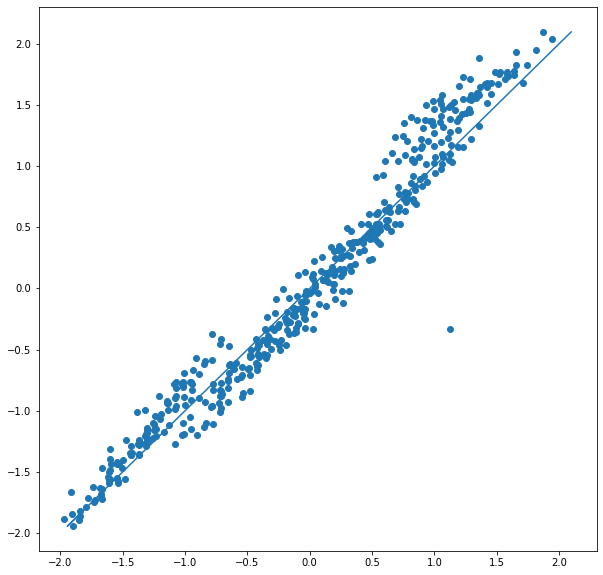

In [32]:
plt.figure(figsize=(10,10))
plt.plot(y,y)
plt.scatter(x, y)
plt.show